First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5702 - loss: 0.6722 - val_accuracy: 0.8571 - val_loss: 0.5917
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7767 - loss: 0.5966 - val_accuracy: 0.8367 - val_loss: 0.5307
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8200 - loss: 0.5279 - val_accuracy: 0.8367 - val_loss: 0.4918
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.4737 - val_accuracy: 0.8571 - val_loss: 0.4572
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8315 - loss: 0.4778 - val_accuracy: 0.8571 - val_loss: 0.4235
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8544 - loss: 0.4172 - val_accuracy: 0.8571 - val_loss: 0.3999
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.3808 - val_accuracy: 0.8571 - val_loss: 0.3900
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3975 - val_accuracy: 0.8776 - val_los

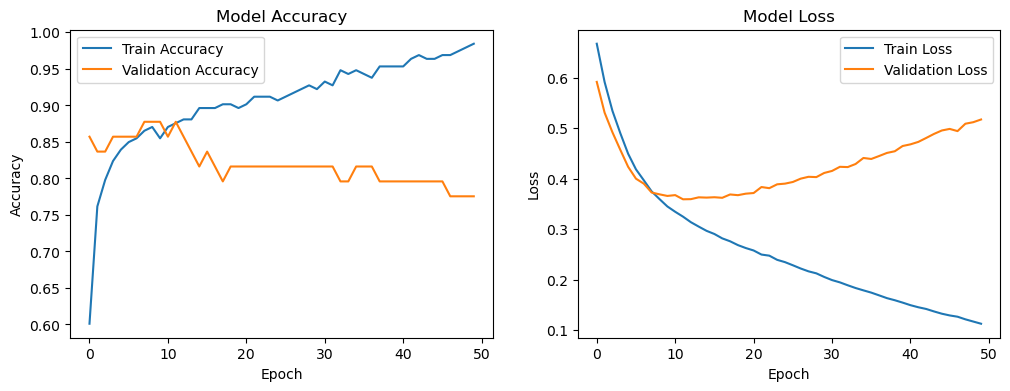

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction for new patient data: Heart Disease


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


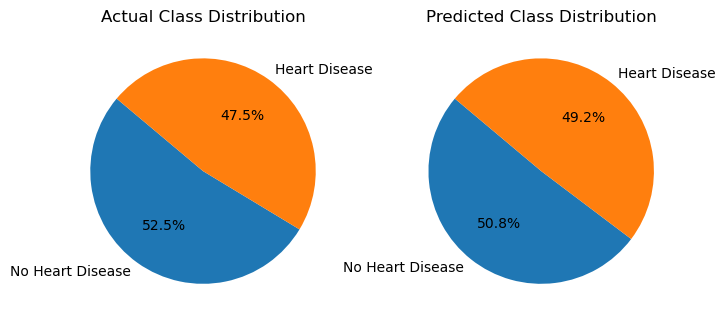

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/saqlaintayab/Desktop/heart.csv')

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Preprocessing
# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Plotting Training History
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Function to make predictions for new inputs
def predict_heart_disease(input_data):
    input_data_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    prediction = model.predict(input_data_scaled)
    return 'Heart Disease' if prediction > 0.5 else 'No Heart Disease'

# Example prediction
new_patient_data = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]  # Example input
prediction = predict_heart_disease(new_patient_data)
print(f'Prediction for new patient data: {prediction}')

# Pie chart for actual classes
actual_counts = y_test.value_counts()
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.title('Actual Class Distribution')

# Pie chart for predicted classes
predicted_counts = pd.Series(y_pred_classes.flatten()).value_counts()
plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.title('Predicted Class Distribution')

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_dataset.csv'

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5010 - loss: 0.6999 - val_accuracy: 0.5510 - val_loss: 0.6682
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6193 - loss: 0.6461 - val_accuracy: 0.6939 - val_loss: 0.6331
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7676 - loss: 0.6044 - val_accuracy: 0.7755 - val_loss: 0.5955
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.5740 - val_accuracy: 0.7959 - val_loss: 0.5631
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8542 - loss: 0.5134 - val_accuracy: 0.7959 - val_loss: 0.5224
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8778 - loss: 0.4760 - val_accuracy: 0.8163 - val_loss: 0.4841
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8171 - loss: 0.4962 - val_accuracy: 0.8367 - val_loss: 0.4598
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.4506 - val_accuracy: 0.8776 - val_loss: 0.4319
Epo

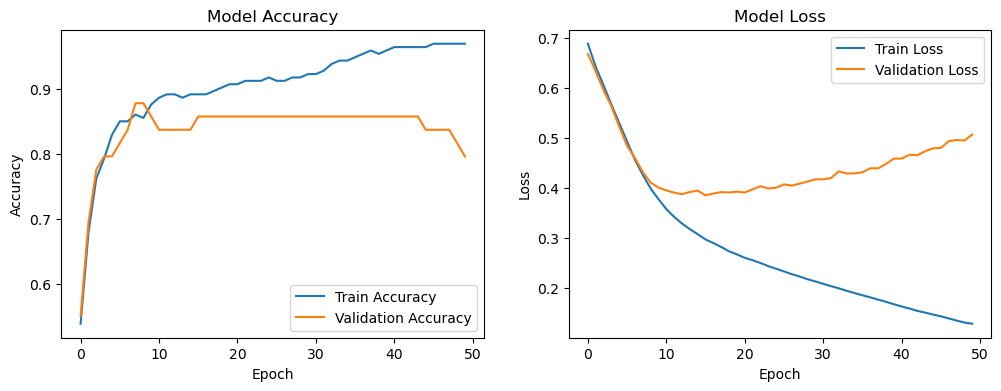

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction for new patient data: Heart Disease


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


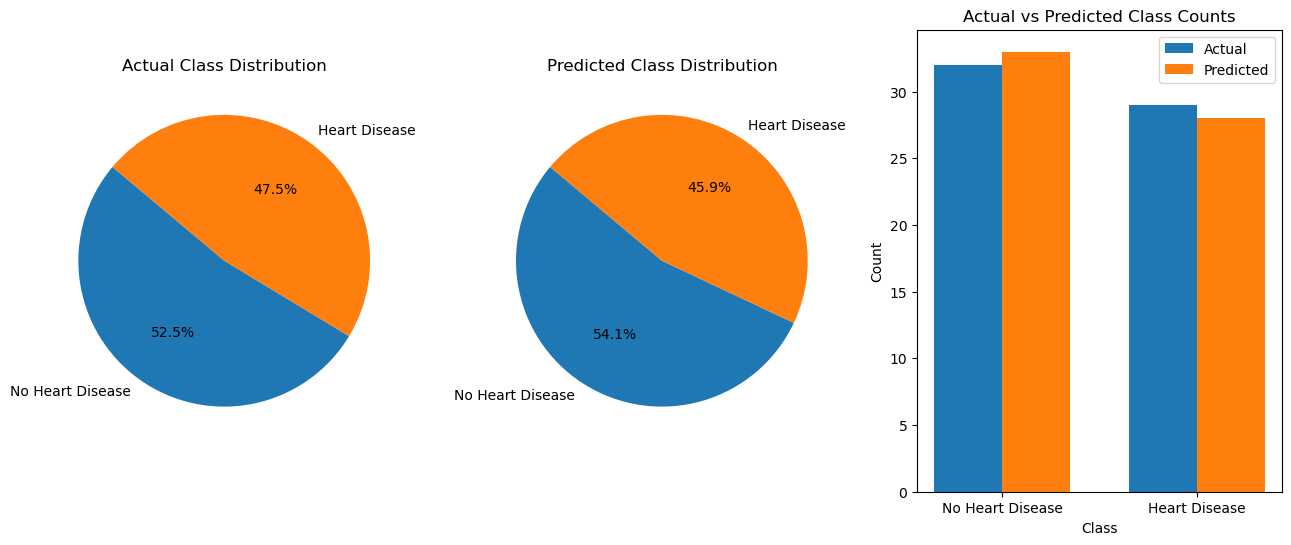

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/saqlaintayab/Desktop/heart.csv')

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Preprocessing
# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Plotting Training History
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Function to make predictions for new inputs
def predict_heart_disease(input_data):
    input_data_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    prediction = model.predict(input_data_scaled)
    return 'Heart Disease' if prediction > 0.5 else 'No Heart Disease'

# Example prediction
new_patient_data = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]  # Example input
prediction = predict_heart_disease(new_patient_data)
print(f'Prediction for new patient data: {prediction}')

# Pie chart for actual classes
actual_counts = y_test.value_counts()
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.pie(actual_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.title('Actual Class Distribution')

# Pie chart for predicted classes
predicted_counts = pd.Series(y_pred_classes.flatten()).value_counts()
plt.subplot(1, 3, 2)
plt.pie(predicted_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.title('Predicted Class Distribution')

# Bar graph for actual vs predicted counts
plt.subplot(1, 3, 3)
bar_width = 0.35
index = np.arange(2)
bar1 = plt.bar(index, actual_counts, bar_width, label='Actual')
bar2 = plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(index + bar_width / 2, ('No Heart Disease', 'Heart Disease'))
plt.legend()
plt.title('Actual vs Predicted Class Counts')

plt.show()


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3638 - loss: 0.7972 - val_accuracy: 0.4286 - val_loss: 0.7383
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5288 - loss: 0.6938 - val_accuracy: 0.6327 - val_loss: 0.6654
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6090 - loss: 0.6514 - val_accuracy: 0.6531 - val_loss: 0.6119
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7720 - loss: 0.5874 - val_accuracy: 0.7143 - val_loss: 0.5643
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8078 - loss: 0.5445 - val_accuracy: 0.7347 - val_loss: 0.5239
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8147 - loss: 0.5060 - val_accuracy: 0.7959 - val_loss: 0.4873
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8279 - loss: 0.4897 - val_accuracy: 0.7959 - val_loss: 0.4543
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8514 - loss: 0.4316 - val_accuracy: 0.8367 - val_loss: 0.4279
Epo

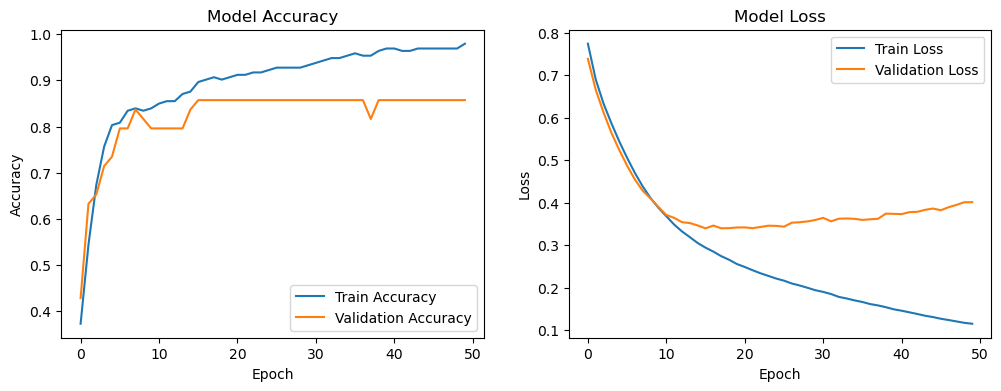

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction for new patient data: Heart Disease


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


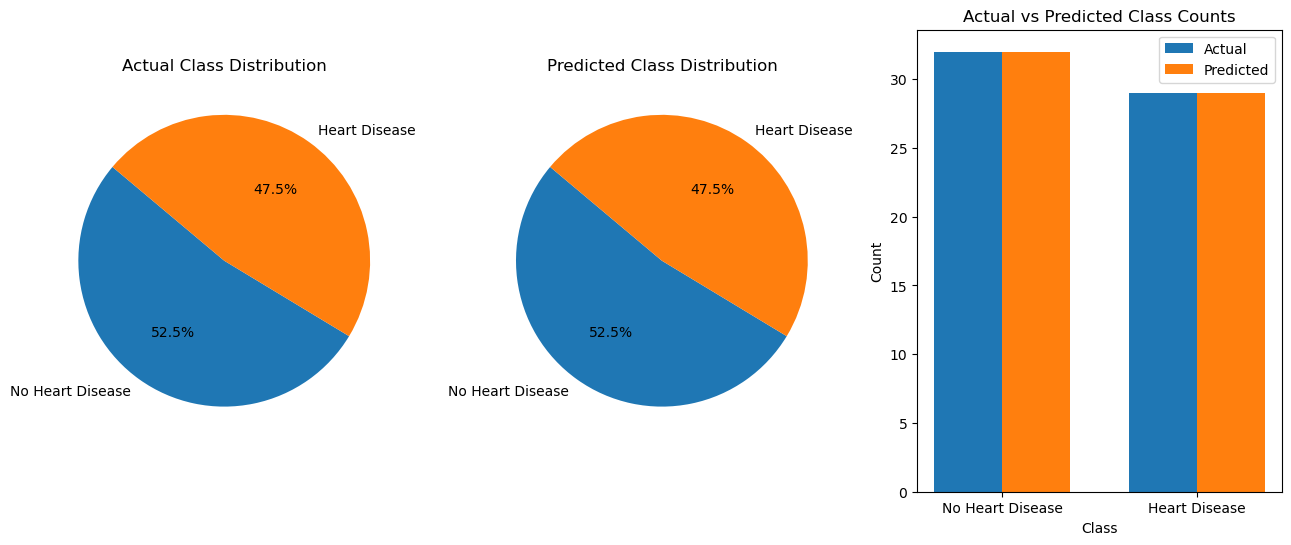

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/saqlaintayab/Desktop/heart.csv')

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Preprocessing
# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Plotting Training History
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Function to make predictions for new inputs
def predict_heart_disease(input_data):
    input_data_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    prediction = model.predict(input_data_scaled)
    return 'Heart Disease' if prediction > 0.5 else 'No Heart Disease'

# Example prediction
new_patient_data = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]  # Example input
prediction = predict_heart_disease(new_patient_data)
print(f'Prediction for new patient data: {prediction}')

# Pie chart for actual classes
actual_counts = y_test.value_counts()
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.pie(actual_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.title('Actual Class Distribution')

# Pie chart for predicted classes
predicted_counts = pd.Series(y_pred_classes.flatten()).value_counts()
plt.subplot(1, 3, 2)
plt.pie(predicted_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.title('Predicted Class Distribution')

# Bar graph for actual vs predicted counts
plt.subplot(1, 3, 3)
bar_width = 0.35
index = np.arange(2)
bar1 = plt.bar(index, actual_counts, bar_width, label='Actual')
bar2 = plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(index + bar_width / 2, ('No Heart Disease', 'Heart Disease'))
plt.legend()
plt.title('Actual vs Predicted Class Counts')

plt.show()


In [37]:

for i in range (21):
    print(i*2)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40


In [49]:
a=["malayalam"]
b=a.reverse()
c=b
if a==c:
    print("it is a palidrome ")
else:
    print("it is not")

it is not
